In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

Mounted at /content/drive/


In [17]:
df = pd.read_csv("/content/drive/MyDrive/HeartDisease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
X = df.drop('target', axis=1)
y = df['target']
sc = StandardScaler()
gnb = GaussianNB()
rfc = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
gnb_accuracy = []
gnb_precision = []
gnb_recall = []
gnb_f1 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)

    gnb_accuracy.append(accuracy_score(y_test, y_pred))
    gnb_precision.append(precision_score(y_test, y_pred))
    gnb_recall.append(recall_score(y_test, y_pred))
    gnb_f1.append(f1_score(y_test, y_pred))

for i in range(kf.n_splits):
    print(f"Fold {i+1} Accuracy: {gnb_accuracy[i] * 100:.2f}%, Precision: {gnb_precision[i] * 100:.2f}%, Recall: {gnb_recall[i] * 100:.2f}%, F1 score: {gnb_f1[i] * 100:.2f}%")
print(f"Mean accuracy: {np.mean(gnb_accuracy) * 100:.2f}%, mean precision: {np.mean(gnb_precision) * 100:.2f}%, mean recall: {np.mean(gnb_recall) * 100:.3f}%, mean f1 score: {np.mean(gnb_f1) * 100:.3f}%")

Fold 1 Accuracy: 86.89%, Precision: 90.00%, Recall: 84.38%, F1 score: 87.10%
Fold 2 Accuracy: 81.97%, Precision: 84.62%, Recall: 86.84%, F1 score: 85.71%
Fold 3 Accuracy: 86.89%, Precision: 87.10%, Recall: 87.10%, F1 score: 87.10%
Fold 4 Accuracy: 70.00%, Precision: 68.29%, Recall: 84.85%, F1 score: 75.68%
Fold 5 Accuracy: 78.33%, Precision: 80.00%, Recall: 77.42%, F1 score: 78.69%
Mean accuracy: 80.81%, mean precision: 82.00%, mean recall: 84.116%, mean f1 score: 82.854%


In [10]:
rfc_accuracy = []
rfc_precision = []
rfc_recall = []
rfc_f1 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_test)

    rfc_accuracy.append(accuracy_score(y_test, y_pred))
    rfc_precision.append(precision_score(y_test, y_pred))
    rfc_recall.append(recall_score(y_test, y_pred))
    rfc_f1.append(f1_score(y_test, y_pred))

for i in range(kf.n_splits):
    print(f"Fold {i+1} Accuracy: {rfc_accuracy[i] * 100:.2f}%, Precision: {rfc_precision[i] * 100:.2f}%, Recall: {rfc_recall[i] * 100:.2f}%, F1 score: {rfc_f1[i] * 100:.2f}%")
print(f"Mean accuracy: {np.mean(rfc_accuracy) * 100:.2f}%, mean precision: {np.mean(rfc_precision) * 100:.2f}%, mean recall: {np.mean(rfc_recall) * 100:.3f}%, mean f1 score: {np.mean(rfc_f1) * 100:.3f}%")

Fold 1 Accuracy: 85.25%, Precision: 84.85%, Recall: 87.50%, F1 score: 86.15%
Fold 2 Accuracy: 80.33%, Precision: 88.24%, Recall: 78.95%, F1 score: 83.33%
Fold 3 Accuracy: 83.61%, Precision: 80.00%, Recall: 90.32%, F1 score: 84.85%
Fold 4 Accuracy: 76.67%, Precision: 73.17%, Recall: 90.91%, F1 score: 81.08%
Fold 5 Accuracy: 85.00%, Precision: 84.38%, Recall: 87.10%, F1 score: 85.71%
Mean accuracy: 82.17%, mean precision: 82.13%, mean recall: 86.955%, mean f1 score: 84.226%


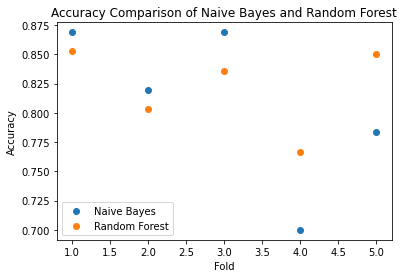

In [12]:
plt.scatter(range(1, len(gnb_accuracy) + 1), gnb_accuracy, label='Naive Bayes')
plt.scatter(range(1, len(rfc_accuracy) + 1), rfc_accuracy, label='Random Forest')
plt.title('Accuracy Comparison of Naive Bayes and Random Forest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

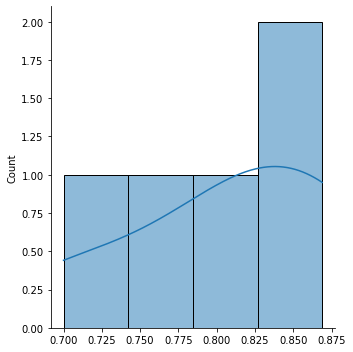

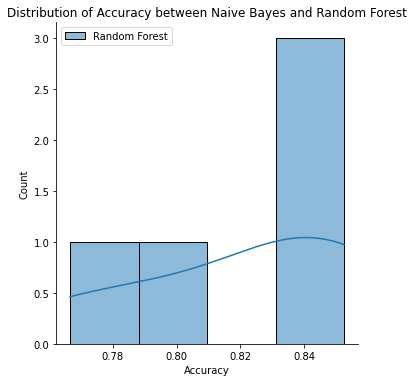

In [13]:
sns.displot(gnb_accuracy, kde=True, label='Naive Bayes')
sns.displot(rfc_accuracy, kde=True, label='Random Forest')
plt.title('Distribution of Accuracy between Naive Bayes and Random Forest')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

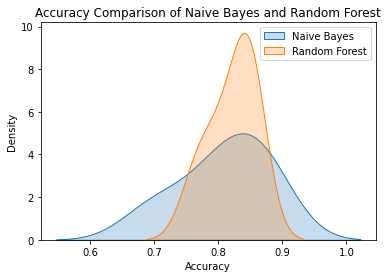

In [14]:
sns.kdeplot(gnb_accuracy, label='Naive Bayes', fill=True)
sns.kdeplot(rfc_accuracy, label='Random Forest', fill=True)
plt.title('Accuracy Comparison of Naive Bayes and Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.legend()
plt.show()

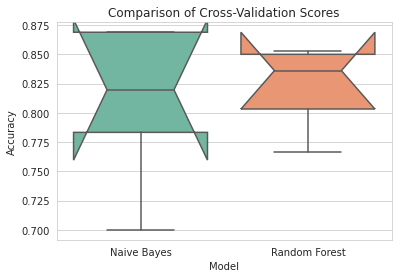

In [15]:
sns.set_style('whitegrid')
sns.boxplot(data=[gnb_accuracy, rfc_accuracy], notch=True, palette='Set2')
plt.title('Comparison of Cross-Validation Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([0, 1], ['Naive Bayes', 'Random Forest'])
plt.show()